In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('secondary_data_no_miss.csv', delimiter=";")

In [23]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a


In [24]:
len(df)

61069

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
print(type(df['cap-shape'][0]))

<class 'str'>


In [27]:
## convert categorical data into numerical encoded values

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
for col in df:
    if type(df[f'{col}'][0]) == type('str'):
        df[f"{col}_encoded"] = ord_enc.fit_transform(df[[col]])
    else:
        df[f"{col}_encoded"] = df[f'{col}']

In [28]:
encoded_df = df[:1000]

In [29]:
for col in encoded_df:
    if not 'encoded' in col:
        encoded_df = encoded_df.drop(col, axis=1)

In [30]:
encoded_df.head()

,class_encoded,cap-diameter_encoded,cap-shape_encoded,cap-surface_encoded,cap-color_encoded,does-bruise-or-bleed_encoded,gill-attachment_encoded,gill-spacing_encoded,gill-color_encoded,stem-height_encoded,stem-width_encoded,stem-color_encoded,has-ring_encoded,ring-type_encoded,habitat_encoded,season_encoded
0,0.0,1.26,6.0,2.0,11.0,0.0,1.0,0.0,10.0,5.04,1.73,12.0,0.0,1.0,0.0,0.0
1,0.0,10.32,2.0,1.0,0.0,0.0,0.0,0.0,0.0,4.68,19.44,11.0,1.0,1.0,0.0,0.0
2,1.0,0.92,6.0,2.0,7.0,0.0,0.0,0.0,7.0,4.59,1.15,4.0,0.0,1.0,0.0,2.0
3,1.0,4.27,6.0,8.0,7.0,0.0,6.0,0.0,10.0,4.55,6.52,11.0,0.0,1.0,0.0,0.0
4,0.0,3.08,2.0,7.0,10.0,0.0,1.0,1.0,10.0,2.67,5.18,11.0,0.0,1.0,4.0,0.0


In [31]:
X = encoded_df.drop(['class_encoded'], axis=1)
y = encoded_df['class_encoded']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print('Training dataset size:', len(X_train))
print('Testing dataset size:', len(X_test))

Training dataset size: 800
Testing dataset size: 200


In [32]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
y_pred = svclassifier.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.59

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[44 55]
 [27 74]]
              precision    recall  f1-score   support

         0.0       0.62      0.44      0.52        99
         1.0       0.57      0.73      0.64       101

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.58       200
weighted avg       0.60      0.59      0.58       200



In [36]:
f = open("encoded-py.txt", "w")
f.write('ENCODED VALUES \n\n')
for col in df:
    if not 'encoded' in col and (type(df[f'{col}'][0]) == type('str')):
        unique = {}
        uniqueVal = df[col].unique()
        for val in uniqueVal:
            unique[val] = df[f'{col}_encoded'].loc[df[col] == val].values[0]
        f.write(str(col))
        f.write('\n')
        for k in unique:
            f.write(str(k))
            f.write(" ")
            f.write(str(int(unique[k])))
            f.write('\n')
        f.write('\n')
f.close()

In [37]:
corr = encoded_df.corr()

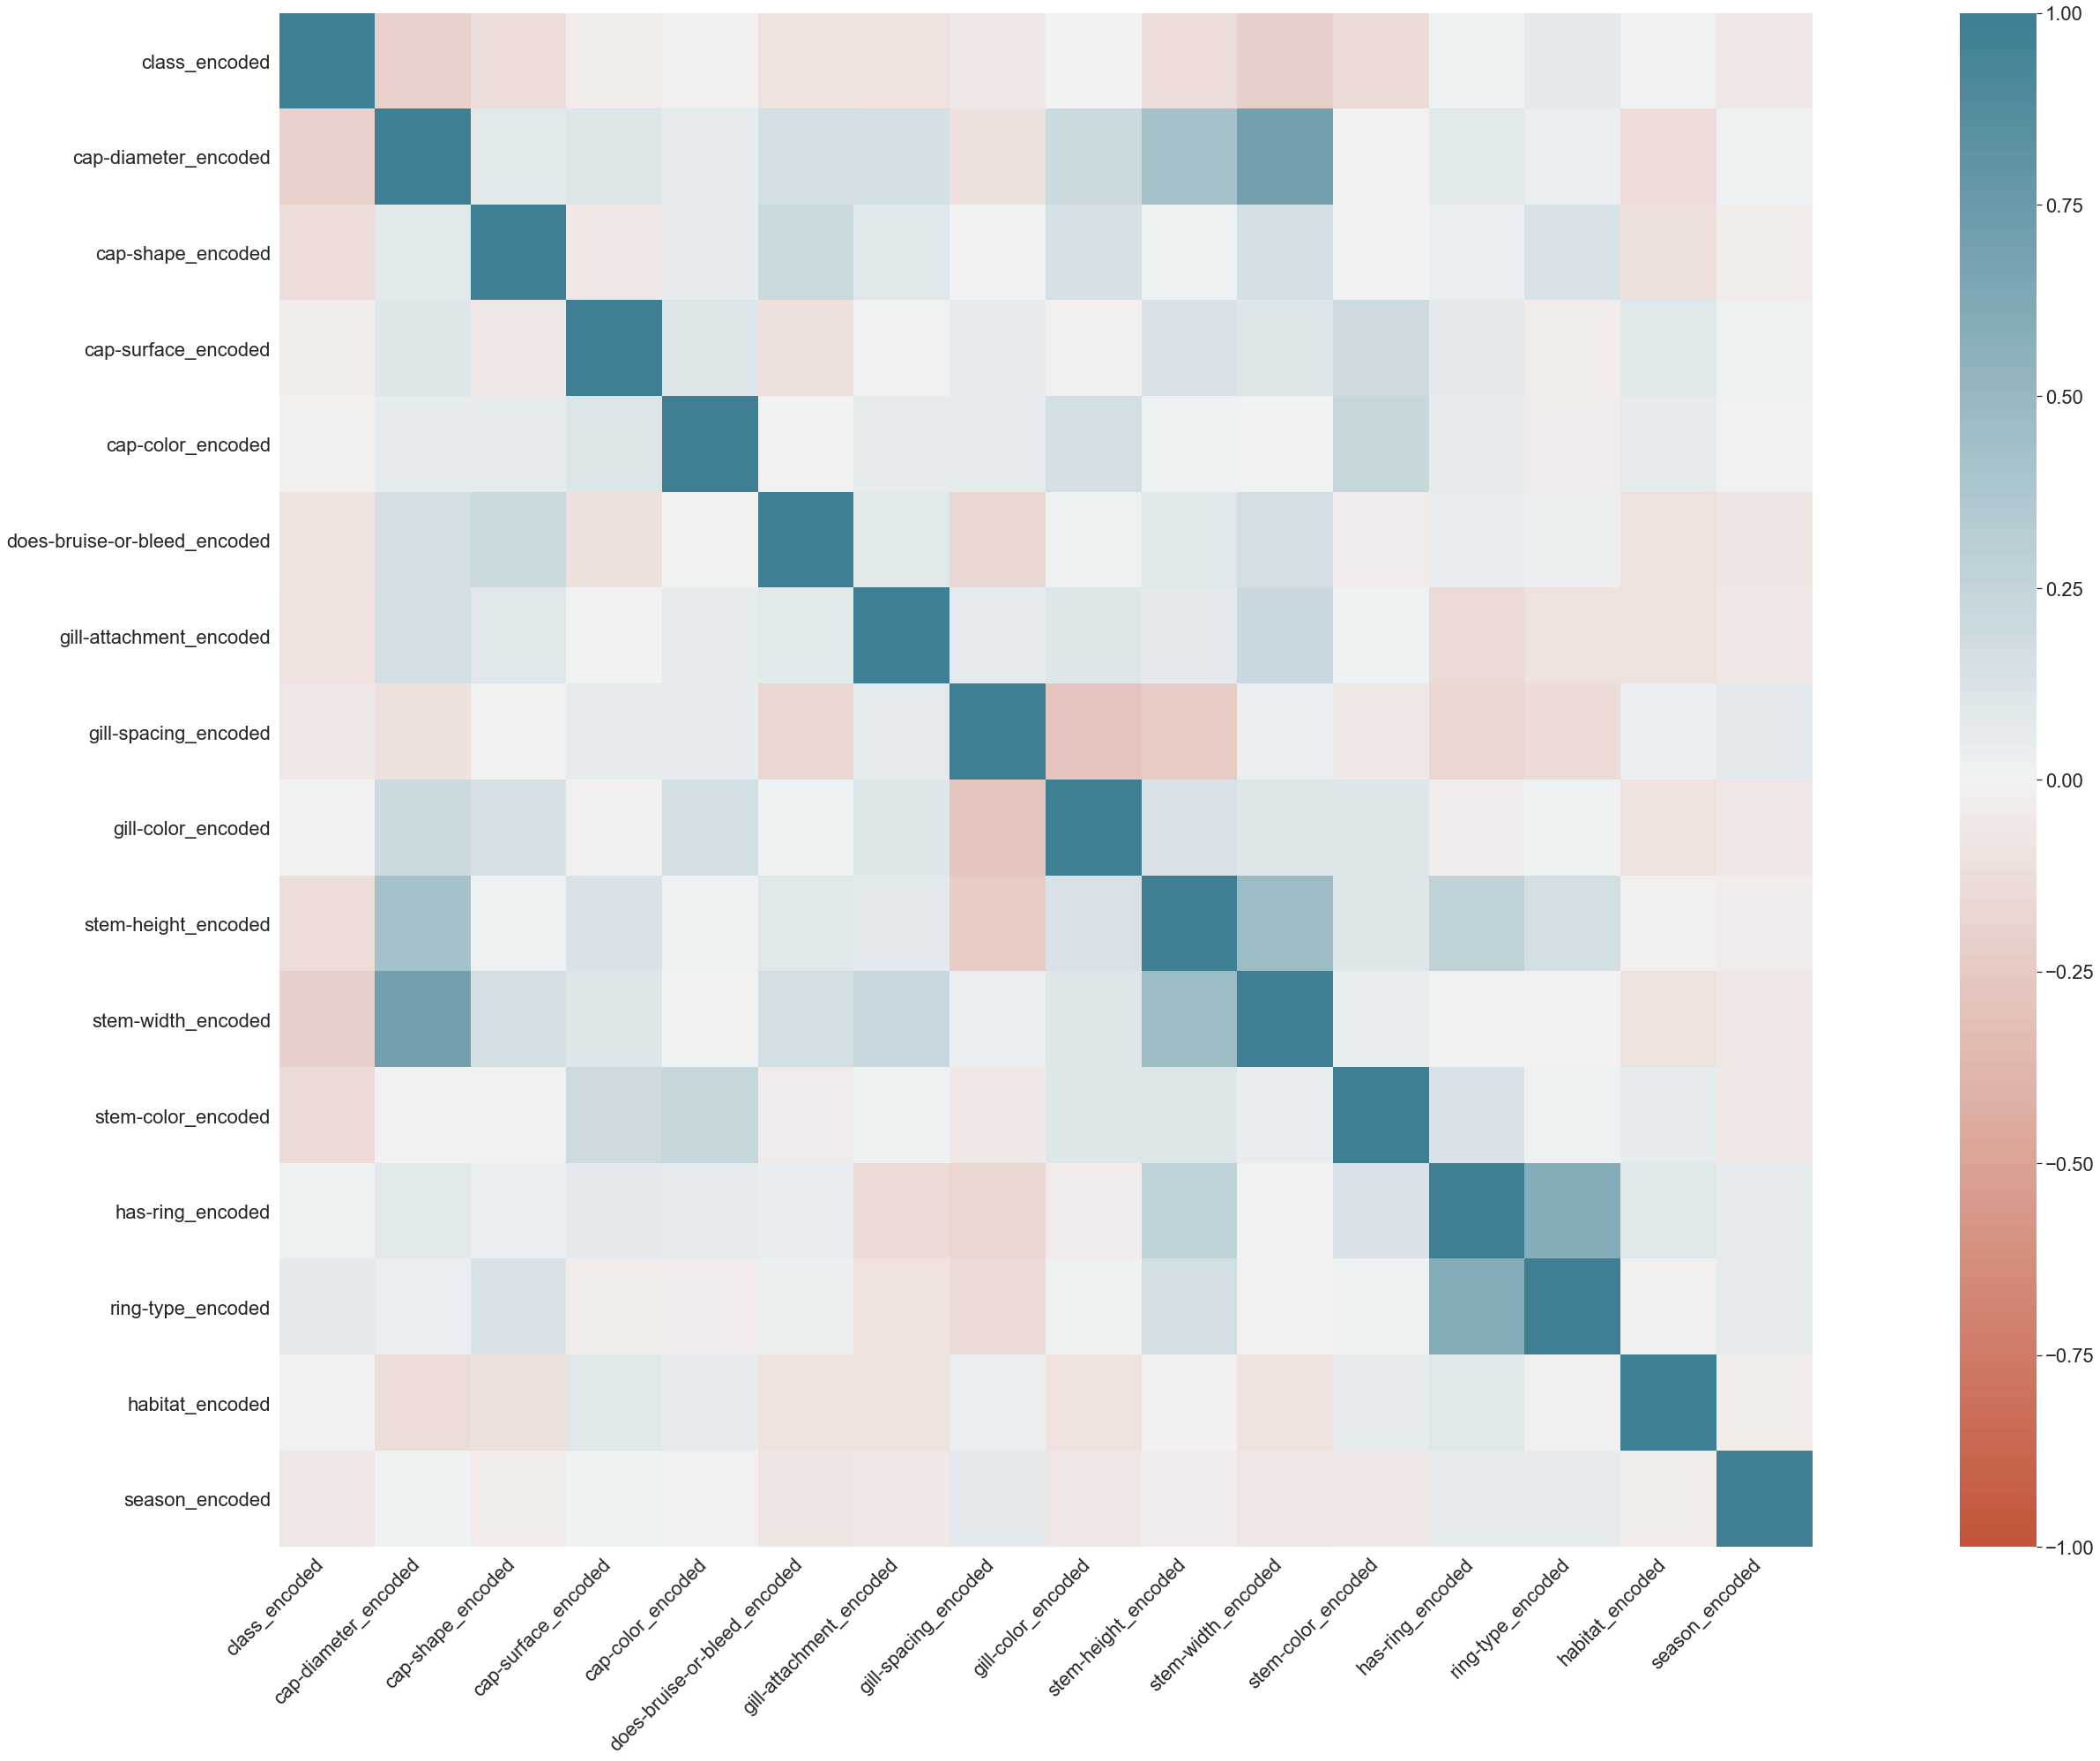

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(60,32)})
sns.set(font_scale=2)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [39]:
print(corr['class_encoded'])

class_encoded                   1.000000
cap-diameter_encoded           -0.205508
cap-shape_encoded              -0.124202
cap-surface_encoded            -0.042252
cap-color_encoded              -0.019299
does-bruise-or-bleed_encoded   -0.086041
gill-attachment_encoded        -0.108691
gill-spacing_encoded           -0.070305
gill-color_encoded             -0.006325
stem-height_encoded            -0.122614
stem-width_encoded             -0.216294
stem-color_encoded             -0.151474
has-ring_encoded                0.009783
ring-type_encoded               0.074220
habitat_encoded                -0.005343
season_encoded                 -0.065404
Name: class_encoded, dtype: float64


In [41]:
f = open("svm-results-newDataset.txt", "w")
f.write('Accuracy = '+ str(accuracy_score(y_test, y_pred)) + '\n\n')
f.write(str(classification_report(y_test,y_pred)) + '\n\n')
f.write('Coefficients: Weights assigned to the features: \n\n')
for x in svclassifier.coef_[0]:
    f.write(str(x) + '\n')
f.write('\n\n')
f.write(f'Number of Support Vectors = {len(svclassifier.support_vectors_)}\nSupport Vectors: \n\n')
for x in svclassifier.support_vectors_:
    print(x)
    f.write(str(x) + '\n')
f.write('\n\n')
f.close()

[ 3.4   0.    2.   10.    0.    6.    1.   10.    3.99  3.05 12.    0.
  1.    1.    0.  ]
[11.43  5.    8.   10.    1.    1.    0.   10.    5.78 26.82 11.    0.
  1.    0.    0.  ]
[ 5.31  6.    8.    5.    0.    0.    1.   10.    6.73  6.27  6.    0.
  1.    0.    3.  ]
[17.51  2.   10.   10.    0.    0.    0.   10.   23.62 20.28  6.    1.
  4.    4.    2.  ]
[ 3.74  0.    2.   10.    0.    6.    1.   10.    4.77  2.94 12.    0.
  1.    1.    0.  ]
[ 7.22  6.    8.   10.    0.    2.    0.   10.    6.15 13.62 12.    1.
  2.    0.    2.  ]
[ 6.33  6.    3.    5.    0.    6.    0.   10.    5.62  6.54  6.    1.
  6.    0.    2.  ]
[4.59 6.   8.   4.   0.   1.   0.   8.   6.85 8.82 9.   0.   1.   0.
 2.  ]
[ 9.31  6.    7.    5.    0.    2.    0.    7.    6.38 10.01 11.    0.
  1.    0.    0.  ]
[4.5  2.   2.   5.   0.   0.   1.   3.   6.39 3.59 3.   0.   1.   0.
 2.  ]
[ 8.3   6.    7.    5.    0.    2.    0.   10.    5.79  9.86 11.    0.
  1.    0.    3.  ]
[ 4.52  2.    8.    6.    0. 